# Horizon tiling of the sky

Computation of the angular size of the horizon at a given redshift z, projected on the sky.

In [55]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

import camb

In [56]:
# Set up the parameters for CAMB

# Set up the parameters for the fiducial cosmology
#pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
#                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06);

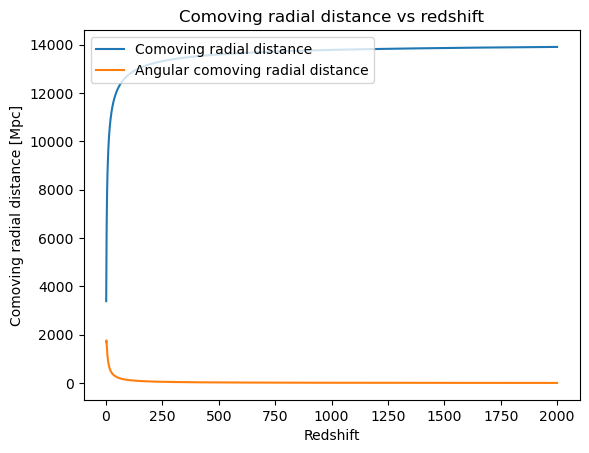

In [57]:
# Computing comoving distance and angular comoving distance for the fiducial cosmology

#results1 = camb.get_results(pars) # Get the results for the fiducial cosmology
results = camb.get_background(pars) # Get the background results

# Redshift values
n_points = 2000# 
z = np.linspace(1, 2000, n_points) 

 # Comoving radial distance
chi = results.comoving_radial_distance(z)

# Angular comoving radial distance 
ang_chi = chi / (1 + z)

# Plot
plt.plot(z, chi, label='Comoving radial distance')
plt.plot(z, ang_chi, label='Angular comoving radial distance')  
plt.legend(loc='upper left')
plt.xlabel('Redshift')
plt.ylabel('Comoving radial distance [Mpc]')
plt.title('Comoving radial distance vs redshift')
#plt.xlim(0, 2)

plt.show()



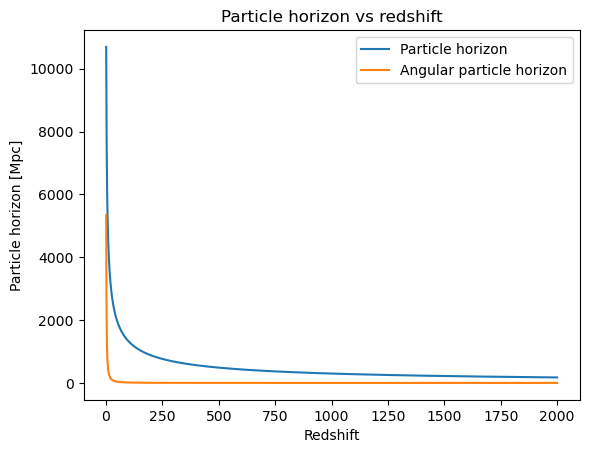

In [58]:
# Computing the particle horizon for the fiducial cosmology at different redshifts

# Array of infinite redshifts
z_inf = np.full(n_points, np.inf)

# Computing the particle horizon from infinity to redshift z
ph = results.comoving_radial_distance(z_inf) - results.comoving_radial_distance(z)

#Computing the angular particle horizon 
ang_ph = ph / (1 + z)

# Reshaffling the array to have the particle horizon at redshift z in the same order as z
#ph = ph[::-1]

# Plot
plt.plot(z, ph, label='Particle horizon')
plt.plot(z, ang_ph, label='Angular particle horizon')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Particle horizon [Mpc]')
plt.title('Particle horizon vs redshift')
#plt.xlim(0, 2)
plt.show()

In [59]:
# Consistency check with professor Branchini's results (L12 - inflazione1, slide 5)
print('Consistency check with professor Branchini results- L12 - inflazione1, slide 5')
print('The particle horizon at redshift z=1100 is', ph[1100], 'Mpc')
print('The angular particle horizon at redshift z=1100 is', ang_ph[1100], 'Mpc')
print('The comoving radial distance at redshift z=1100 is', chi[1100], 'Mpc')
print('The angular comoving radial distance at redshift z=1100 is', ang_chi[1100], 'Mpc')
print('The results are consistent with the ones in the slides in Mpc.') 

Consistency check with professor Branchini results- L12 - inflazione1, slide 5
The particle horizon at redshift z=1100 is 277.57581959193885 Mpc
The angular particle horizon at redshift z=1100 is 0.2518836838402349 Mpc
The comoving radial distance at redshift z=1100 is 13806.746021544166 Mpc
The angular comoving radial distance at redshift z=1100 is 12.528807642054597 Mpc
The results are consistent with the ones in the slides in Mpc.


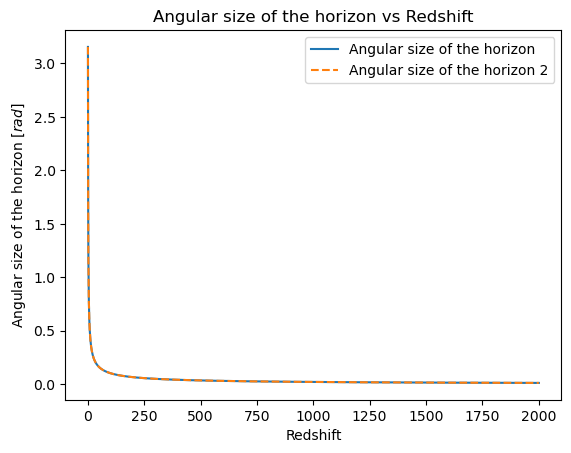

In [60]:
# Computing the angular size of the horizon at different redshifts
theta  = ph / chi # Angular size of the horizon in radians 

# Consistency check with angular diameter distance
theta2 = ang_ph / ang_chi # Angular size of the horizon in radians
 
# Plot
plt.plot(z, theta, label='Angular size of the horizon')
plt.plot(z, theta2, label='Angular size of the horizon 2', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Angular size of the horizon [$rad$]')
plt.title('Angular size of the horizon vs Redshift')
#plt.xlim(1075, 1125)
#plt.ylim(0, 0.05)
plt.show()

In [61]:
# Theta at z = 1100
theta_1100 = theta[np.where(z == 1100)]
theta2_1100 = theta2[np.where(z == 1100)]
print('Angular size of the horizon at z = 1100: ', theta_1100, 'rad')
print('Angular size of the horizon at z = 1100: ', theta2_1100, 'rad')
print('Angular size of the horizon at z = 1100 in degrees: ', np.degrees(theta_1100))
print('Angular size of the horizon at z = 1100 in degrees: ', np.degrees(theta2_1100))


Angular size of the horizon at z = 1100:  [0.02011826] rad
Angular size of the horizon at z = 1100:  [0.02011826] rad
Angular size of the horizon at z = 1100 in degrees:  [1.15269128]
Angular size of the horizon at z = 1100 in degrees:  [1.15269128]


In [62]:
# Checking where z = 1100
z[1099]

1100.0

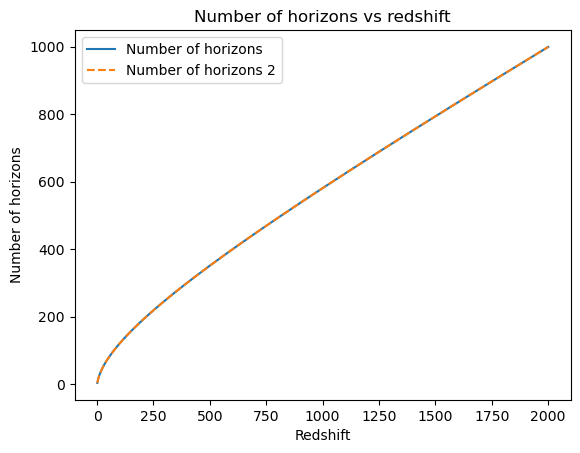

In [63]:
# Counting how many horizon sizes are in the observable universe
theta_obs = 4 * np.pi
n_horizons = theta_obs / theta
n_horizons2 = theta_obs / theta2

# Plot
plt.plot(z, n_horizons, label='Number of horizons')
plt.plot(z, n_horizons2, label='Number of horizons 2', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Number of horizons')
plt.title('Number of horizons vs redshift')
#plt.xlim(1075, 1125)
#plt.ylim(0, 5)
plt.show()


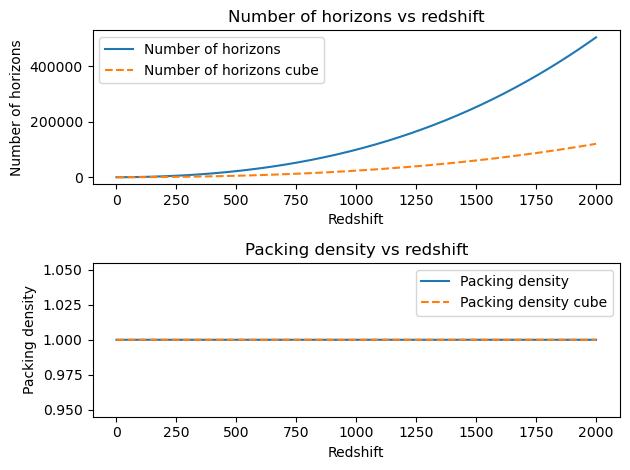

In [64]:
# Counting how many horizon sizes are in the observable universe with sphere packing technique

# The volume of the observable universe seen as a sphere and as a cube
V_obs_sph = 4/3 * np.pi * (chi)**3
V_obs_cub = chi**3

# The volume of the particle horizon at different redshifts
V_horizon = 4/3 * np.pi * (ph)**3

# The number of horizons in the observable universe
n_horizons_sphere = V_obs_sph / V_horizon
n_horizons_cube = V_obs_cub / V_horizon

# Checking the packing density to turn out as proposed by Kepler's conjecture of the sphere packing problem in 1611
packing_density = n_horizons_sphere * V_horizon / V_obs_sph
packing_density_cube = n_horizons_cube * V_horizon / V_obs_cub # it should be around 0.74

# Plot
plt.subplot(2, 1, 1)
plt.plot(z, n_horizons_sphere, label='Number of horizons')
plt.plot(z, n_horizons_cube, label='Number of horizons cube', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Number of horizons')
plt.title('Number of horizons vs redshift')

plt.subplot(2, 1, 2)
plt.plot(z, packing_density, label='Packing density')
plt.plot(z, packing_density_cube, label='Packing density cube', linestyle='--')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Packing density')
plt.title('Packing density vs redshift')

plt.tight_layout()
plt.show()


In [65]:
packing_density

array([1., 1., 1., ..., 1., 1., 1.])